#**Capstone Project**
###Goodreads Book Dataset
*by Derin Bilgin*

For the capstone project, I choose a dataset which is about the books in some website about books and their reviews (GoodReads). 

* You can reach the dataset from this link: https://www.kaggle.com/jealousleopard/goodreadsbooks

The main reason that I chose this dataset is that I love everything about books and I want to gain more information about them and predict and see the results of the questions that I have on my mind. So, I want to work with this dataset to have a clean dataset and knowledge about books (on Goodreads).

For this part of the capstone project, our general aim is to understand data, analyze it and develop some questions to proceed to the next level of the project (for the machine learning part).

We have to move the project step by step to proceed in order and properly. We have 7 steps to reach results for this part of the project. Let's look at those steps:

1. **Identify Problem:** Identify and hypothesize goals and research questions

2. **Acquire Data:** Import data and determine most appropriate tools for data manipulation

3. **Parse:** Verify the quality of data and perform exploratory data analysis

4. **Mine:** Format, clean, slice and combine data

5. **Refine:** Apply descriptive and inferential statistics

6. **Build Data Viz:** Create data visualisation

7. **Present Results:** Summarize findings with narrative and storytelling techniques, present limitations, assumptions and future analysis with actionable recommendations

Before starting those steps, let's import the necessary libraries. We can always update them according to our needs.

In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import altair as alt

Our dataset was determined, so now, we need to identify our goals and research questions.

The dataset that I chose was about the books with ratings in GoodReads, which include the title, author(s), average rating, ISBN, ISBN-13, language, page number, number of ratings, number of text reviews, publication data and the publisher of the book.



In [ ]:
#Import the dataset from a csv file and named as books
books = pd.read_csv('/content/books.csv', error_bad_lines=False)
#Without "error_bad_lines", we took error because there are different number of lines than expected. So, we add "error_bad_lines" to prevent it.

#We keep the original data named as data in case that we needed.
data = books

#Let's just see the beginning of the dataframe to have a general idea
books.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


Let's look at the columns descriptions:

> **bookID:** The unique ID for each book/series

> **title:** The titles of the books

> **authors:** The author(s) of the particular book

> **average_rating:** The average rating of the books, as decided by the users

> **ISBN:** ISBN(10) number, tells the information about a book - such as edition and publisher

> **ISBN13:** The new format for ISBN (2007), 13 digits.

> **language_code:** The language for the books

> **Num_pages:** The number of pages for the book

> **Ratings_count:** The number of ratings given for the book

> **text_reviews_count:** The count of reviews left by users

>**publication_date:** Publication date of the book

>**publisher:** Publisher of the book


In [ ]:
#We don't need to have "bookID", "ISBN" or "ISBN-13" to analyze this dataset, so, we are deleting it
books.drop(['bookID','isbn','isbn13'],axis = 1,inplace=True)

In [ ]:
#Finding number of rows and columns in the dataset
print("Dataset contains {} rows and {} columns".format(books.shape[0], books.shape[1]))

Dataset contains 11123 rows and 9 columns


In [ ]:
#While looking at the dataset, I realize that some books have more than one author. 
#So, for the simplicity, I reduce the number of the author for each book to one by eliminating the rest of the authors

splitted = books["authors"].str.split("/")

for i in range(len(books['authors'])):
  books['authors'].iloc[i] = splitted[i][0]

books.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
#Let's change the column names
books = books.rename(columns={'title'             : 'Title',
                              'authors'           : 'Author',
                              'average_rating'    : 'Rating',
                              'language_code'     : 'Language',
                              '  num_pages'       : 'Page Number',
                              'ratings_count'     : 'Number of Ratings',
                              'text_reviews_count': 'Number of Text Reviews',
                              'publication_date'  : 'Publication Date',
                              'publisher'         : 'Publisher'})

#And check
books.head()

,Title,Author,Rating,Language,Page Number,Number of Ratings,Number of Text Reviews,Publication Date,Publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
#Let's check whether we have multiple entities for a single book. And if we have, we will delete those duplicates
print("Number of total books: {}".format(books['Title'].count()))
print("Number of unique books: {}".format(books['Title'].value_counts().count()),"\n")

if books['Title'].count() != books['Title'].value_counts().count():
  books = books.drop_duplicates(subset='Title', keep='first')

#And check the results
print("After the operation of deleting the duplicates:")
print("Number of total books: {}".format(books['Title'].count()))
print("Number of unique books: {}".format(books['Title'].value_counts().count()))

Number of total books: 11123
Number of unique books: 10348 

After the operation of deleting the duplicates:
Number of total books: 10348
Number of unique books: 10348


We are going to look at the "publisher" column to arrange. First, let's look at the unique values in that column:

In [ ]:
books['Publisher'].unique()

array(['Scholastic Inc.', 'Scholastic', 'Nimble Books', ..., 'Suma',
       'Panamericana Editorial', 'Editorial Presença'], dtype=object)

We combine the same publishers together:

In [ ]:
books['Publisher'] = books['Publisher'].replace({'Scholastic':'Scholastic Inc.'})
books['Publisher'] = books['Publisher'].replace({'Harper Perennial':'HarperCollins'})
books['Publisher'] = books['Publisher'].replace({'Penguin Classics':'Penguin Books'})

Now, we are going to add a integer value named as rating_point that represents the points of the book that got from the users. And we will calculate that point by:

> rating_point = average_rating * ratings_count

PS: This rating point is not a real value. I added it for easier understandment.

In [ ]:
books['Rating Point'] = books['Rating'] * books['Number of Ratings']

After make some adjustments, let's look at the dataset a little bit deeper:

In [ ]:
#Get the information of the dataset
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10348 entries, 0 to 11122
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   10348 non-null  object 
 1   Author                  10348 non-null  object 
 2   Rating                  10348 non-null  float64
 3   Language                10348 non-null  object 
 4   Page Number             10348 non-null  int64  
 5   Number of Ratings       10348 non-null  int64  
 6   Number of Text Reviews  10348 non-null  int64  
 7   Publication Date        10348 non-null  object 
 8   Publisher               10348 non-null  object 
 9   Rating Point            10348 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 889.3+ KB


In [ ]:
#Checking if there are any missing values
books.isnull().sum()

Title                     0
Author                    0
Rating                    0
Language                  0
Page Number               0
Number of Ratings         0
Number of Text Reviews    0
Publication Date          0
Publisher                 0
Rating Point              0
dtype: int64

In [ ]:
#Look at the number of unique values for each column in the dataset for better understandment
books.nunique()

Title                     10348
Author                     4190
Rating                      209
Language                     26
Page Number                 969
Number of Ratings          5083
Number of Text Reviews     1754
Publication Date           3524
Publisher                  2194
Rating Point               9688
dtype: int64

Let's look at the results from above codes. We have 10 different columns named as:

> Title • Authors • Rating • Language • Page Number • Number of Ratings • Number of Text Reviews • Publication Date • Publisher • Rating Point

The types of the ones with text in it (i.e. title or the publisher of the book) is object, other ones are integer or float.

There is no missing values in the dataset, so, there is no need to fill in.

And every column has more than one different values.

So, let's look at the descriptive statitics of the dataset.  This descriptive statistics are only available for integer or float numbers.

In [ ]:
#Look at the descriptive statistics
pd.set_option('display.float_format', lambda x: '%.3f' % x)
books.describe()

,Rating,Page Number,Number of Ratings,Number of Text Reviews,Rating Point
count,10348.000,10348.000,10348.000,10348.000,10348.000
mean,3.933,333.427,17169.827,528.923,68949.806
std,0.357,238.362,107585.512,2500.462,432662.419
min,0.000,0.000,0.000,0.000,0.000
25%,3.770,192.000,106.000,9.000,414.653
50%,3.960,296.000,805.000,48.000,3159.330
75%,4.140,410.000,5305.750,244.250,21074.115
max,5.000,6576.000,4597666.000,94265.000,16505620.940


* Count value of the columns are 10348. We already know that value from the beginning of the project. There were 10348 unique titles in the dataset.

* For the *Rating* column:
  * The range is from 0 to 5, and the mean is 3.93 out of 5. 
  * When we look at values, the numbers more dominant in the upper quarter (75%) and even in the lower quarter (25%), the value is larger than the middle value (2.50).
  * Standard deviation of the column is 0.357 which means that the data in this column do not spread so much. 
  * As a result, we can say that the average ratings of the books are likely bigger than 3.77 and mostly they are around 3.93 out of 5.

* For the *Page Number* column:
  * The range is from 0 to 6576, and the mean is 333.
  * When we look at the quarterly values, in all of the quarters (25%, 50%, and 75%), the values are much smaller than the maximum value. And the value in the upper quarter is almost equal to mean when we think about the range.
  * Standard deviation of the column is 238.362, which is big, thus, the page number data spread around so much. The reason of this situation is even that the page numbers are mostly in the smaller values, the range is so big and there is so much distance.
  * For the results, the average number of pages of the books are smaller than 410 and mostly they are around 333.

* For the *Number of Ratings* column:
  * The range for this column is very spread. It is from 0 to 4597666, and the mean is 17169.
  * When we look at the percentile values, the values are much smaller than the maximum value. And the value in the upper quarter is smaller than the mean value. This means, even there are books that have very big numbers of ratings, most of the books have smaller number of ratings.
  * Standard deviation is 107585.512, which is very big and means that the data is spreading on very big range.
  * Different from the others, mean value and 50% value are not close to each other. The reason is that even the mean value is big, the data values are expanding around 50% value.
  * As a result, the average number of ratings for the books are smaller than 5305 and mostly they are around 805.

* For *Number of Text Reviews* column:
  * The range is from 0 to 94265, and the mean is 528.
  * When we look at the quarterly values, the values are much smaller than the maximum and mean value. They are stack at the smaller values.
  * Standard deviation is 2500.462, it is a big number, so, the spread of the data is also big.
  * Like the previous column, the mean and 50% values are very different than each other. Which can also be observed with standard deviation.
  * For the result, the average number of text reviews for the books are smaller than 244 and they are around 48 even the mean values are very large.

* For the *Rating Point* column:
  * The range is from 0 to 16505620, and the mean is 68949. 
  * When we look at the percentile values, the are very smaller than max and mean values. We can also observe the values are stack at the smaller values.
  * Standard deviation is 432662.419, it is very big value. And as a result, the spread of the data is also very large.
  * Mean and 50% values are very different than each other.
  * For the final comment, the rating points are smaller than 21074.115 and mostly they are around 3159.

---

After analyzing and understanding the dataset, let's look at it with some visualization for better and easier understanding.

First, let's create a pair plot:

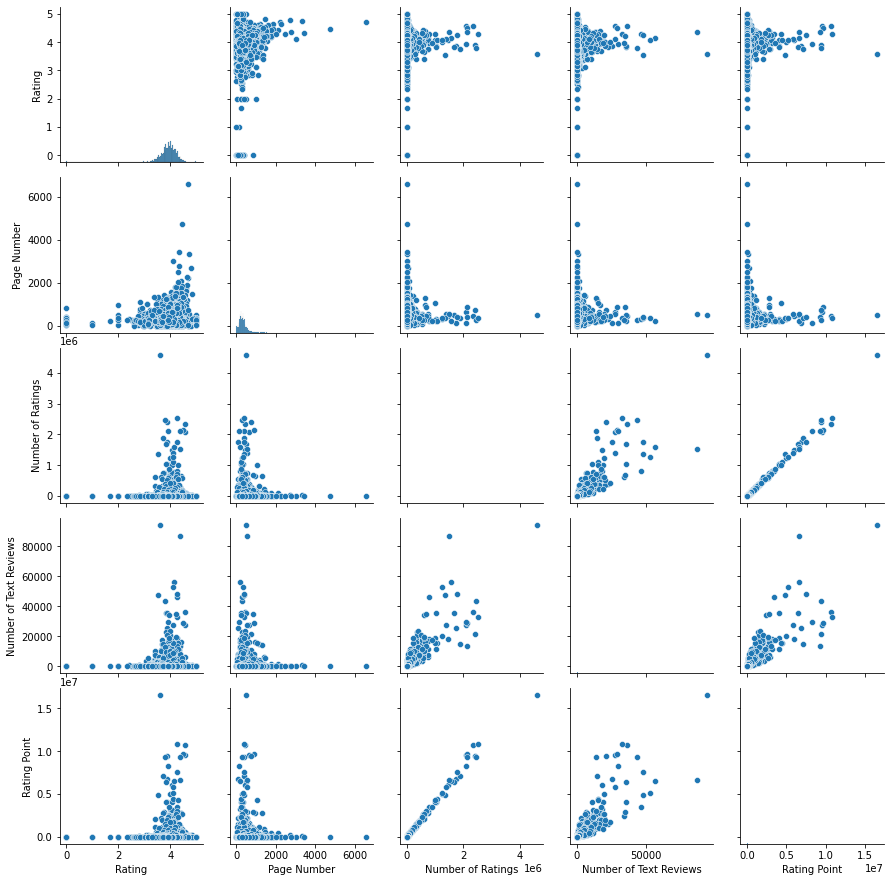

In [ ]:
x_vars = ["Rating", "Page Number", "Number of Ratings", "Number of Text Reviews", "Rating Point"]
y_vars = ["Rating", "Page Number", "Number of Ratings", "Number of Text Reviews", "Rating Point"]
g = sns.PairGrid(books, x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

The diagonals cannot see very clearly, so, by changing their axes scales, we can see each row in the pairplot more clearly below: 

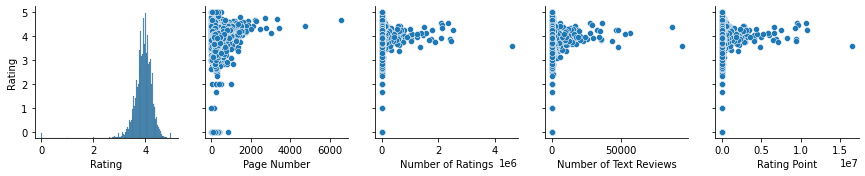

In [ ]:
x_vars = ["Rating", "Page Number", "Number of Ratings", "Number of Text Reviews", "Rating Point"]
y_vars = ["Rating"]
g = sns.PairGrid(books, x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

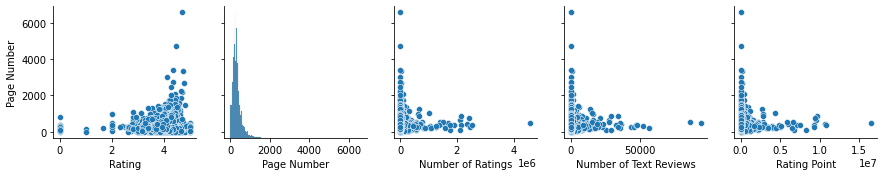

In [ ]:
x_vars = ["Rating", "Page Number", "Number of Ratings", "Number of Text Reviews", "Rating Point"]
y_vars = ["Page Number"]
g = sns.PairGrid(books, x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

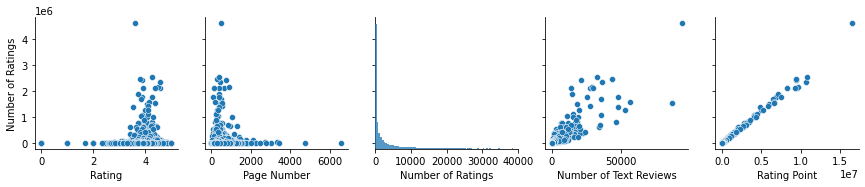

In [ ]:
x_vars = ["Rating", "Page Number", "Number of Ratings", "Number of Text Reviews", "Rating Point"]
y_vars = ["Number of Ratings"]
g = sns.PairGrid(books, x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.axes[0,2].set_xlim(0,40000);

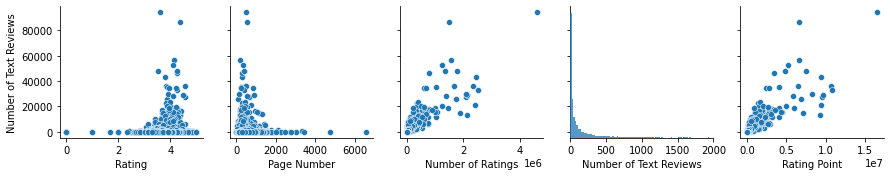

In [ ]:
x_vars = ["Rating", "Page Number", "Number of Ratings", "Number of Text Reviews", "Rating Point"]
y_vars = ["Number of Text Reviews"]
g = sns.PairGrid(books, x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.axes[0,3].set_xlim(0,2000);

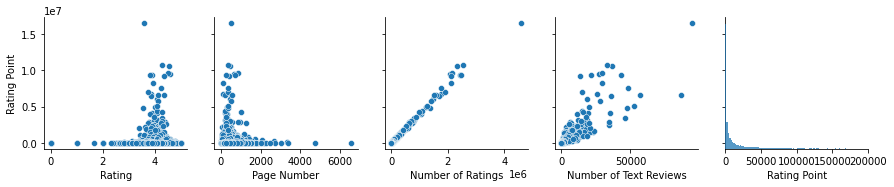

In [ ]:
x_vars = ["Rating", "Page Number", "Number of Ratings", "Number of Text Reviews", "Rating Point"]
y_vars = ["Rating Point"]
g = sns.PairGrid(books, x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.axes[0,4].set_xlim(0,200000);

With a pairplot, we see the relationships between the columns of the dataset. Because of this dataset has big number of rows, it took 57 seconds to run the pairplot code.

- With *Rating*, we can see that most of the books has more than 3.5 ratings (mostly around 4) and it doesn't change with any other variables as *Page Number*, *Number of Ratings*, *Number of Text Reviews*, or *Rating Point*.

- With *Page Number*, we can see that most of the books has around 500 pages and this value doesn't affect other variables.

For the visualization, first determine the general concepts and questions that we want to analyze.

1. Authors with most books
2. Authors with most books that have bigger than 4.5 rating
3. Books with highest rankings
4. Average rating distribution
5. Rankings of the books vs. Publication year
6. Most rated book based on their number of text reviews
7. Most rated book based on their number of numerical reviews
8. Languages of the books
9. Most pages
10. Ratings vs. Page Number
11. Text review count vs. Numeric review count
12. Publishers with their average ratings

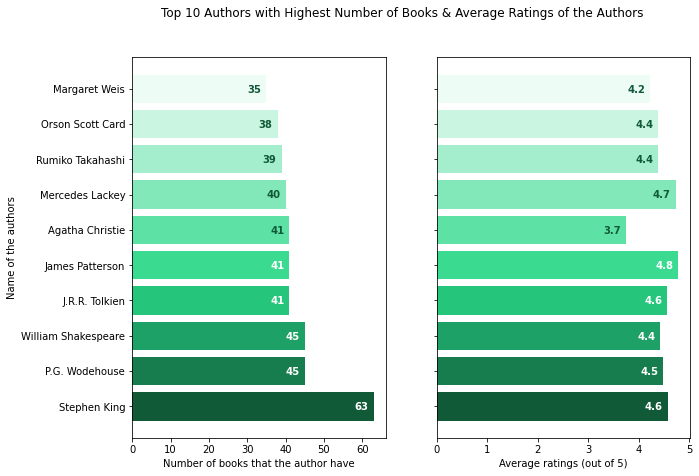

In [ ]:
#1. Authors with most books
#Find the most popular authors
most_author = books.groupby('Author')['Title'].count().reset_index().sort_values('Title',ascending=False).head(10).set_index('Author')

#Find the average ratings of those authors
column_names = ["Author Average Rating"]
n = pd.DataFrame(0, index=np.arange(10),columns = column_names)
for i in books['Author']:
  if i in most_author.index:
    for j in range(len(most_author.index)):
      if i == most_author.index[j]:
        n.loc[j] += books['Rating'].loc[j]

for i in range(10):
  n.iloc[i] = n.iloc[i]/(most_author.iloc[i][0])

#Determine the colors of the bar plots for visualization
colors = ['#115a38','#177d4f','#1ea166','#25c57c','#3ada91','#5ee1a5','#82e8b9','#a5eecd','#c9f5e1','#edfcf5']

#Create bar plots with same y axes
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,7))
fig.suptitle('Top 10 Authors with Highest Number of Books & Average Ratings of the Authors')

ax1.barh(most_author.index, most_author['Title'], color=colors)
ax1.set_xlabel('Number of books that the author have')
ax1.set_ylabel('Name of the authors')

ax2.barh(most_author.index,n['Author Average Rating'], color=colors)
ax2.set_xlabel('Average ratings (out of 5)');

#Determine the colors for the text
colort = ['#FFFFFF','#FFFFFF','#FFFFFF','#FFFFFF','#FFFFFF','#115a38','#115a38','#115a38','#115a38','#115a38']
for i, v in enumerate(most_author['Title']):
  ax1.text(v-5, i-0.1, str(v), color=colort[i], fontweight='bold')
for i, v in enumerate(n['Author Average Rating']):
  ax2.text(v-0.45, i-0.1, str("{0:.1f}".format(v)), color=colort[i], fontweight='bold')

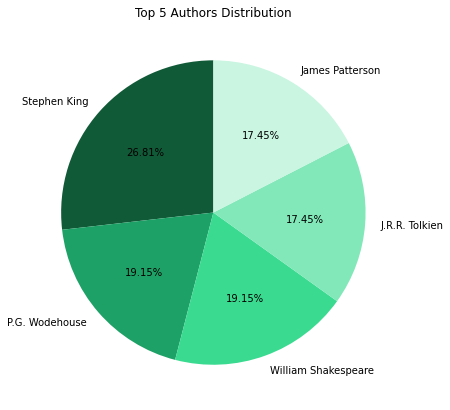

In [ ]:
#Let's look at the top 5 authors in a pie chart

#First find the top 5
five_most_author = books.groupby('Author')['Title'].count().reset_index().sort_values('Title',ascending=False).head(5).set_index('Author')

#Create the pie chart
labels   = five_most_author.index
sections = five_most_author['Title']
colors   = ['#115a38','#1ea166','#3ada91','#82e8b9','#c9f5e1']

figure(figsize=(10, 7))
plt.pie(sections, labels=labels, colors=colors,startangle=90,autopct = '%1.2f%%')
plt.title('Top 5 Authors Distribution')
plt.show()

When we look at the upper bar graphs, we can see most 10 popular authors and their average rankings. 

As a results, we can say that even the author is popular by the value counts, it doesn't mean that he or she have higher ranking.

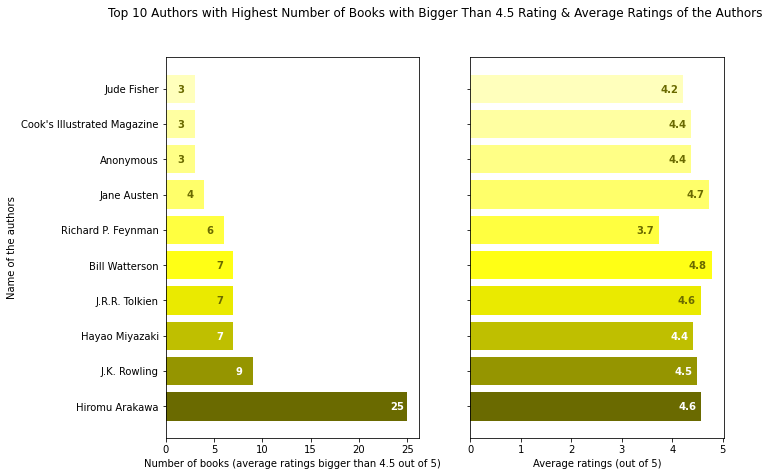

In [ ]:
#2. Authors with most books that have bigger than 4.5 rating
#Find the high rankings which are bigger than 4.5
high_rate = books[books['Rating'] >= 4.5]
high_rate = high_rate.groupby('Author')['Title'].count().reset_index().sort_values('Title',ascending=False).head(10).set_index('Author')

#Find the numbers of books for each author in the dataset
author_books = books.groupby('Author')['Title'].count().reset_index().sort_values('Title').set_index('Author')

#Find the average ratings of those authors
column_names = ["Author Average Rating"]
m = pd.DataFrame(0, index=np.arange(10),columns = column_names)
for i in books['Author']:
  if i in high_rate.index:
    for j in range(len(high_rate.index)):
      if i == high_rate.index[j]:
        m.loc[j] += books['Rating'].loc[j]

for i in range(10):
  for j in author_books.index:
    if j == high_rate.index[i]:
      m.iloc[i] = m.iloc[i] / author_books.loc[j][0]

#Determine the colors of the bar plots for visualization
colors = ['#6a6a00','#959500','#bfbf00','#eaea00','#ffff15','#ffff40','#ffff6a','#ffff86','#ffffa1','#ffffbc']

#Create bar plots with same y axes
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,7))
fig.suptitle('Top 10 Authors with Highest Number of Books with Bigger Than 4.5 Rating & Average Ratings of the Authors')

ax1.barh(high_rate.index, high_rate['Title'], color=colors)
ax1.set_xlabel('Number of books (average ratings bigger than 4.5 out of 5)')
ax1.set_ylabel('Name of the authors')

ax2.barh(high_rate.index,m['Author Average Rating'], color=colors)
ax2.set_xlabel('Average ratings (out of 5)');

#Determine the colors for the text
colort = ['#FFFFFF','#FFFFFF','#FFFFFF','#6a6a00','#6a6a00','#6a6a00','#6a6a00','#6a6a00','#6a6a00','#6a6a00']
for i, v in enumerate(high_rate['Title']):
  ax1.text(v-1.8, i-0.1, str(v), color=colort[i], fontweight='bold')
for i, v in enumerate(m['Author Average Rating']):
  ax2.text(v-0.45, i-0.1, str("{0:.1f}".format(v)), color=colort[i], fontweight='bold')

When we looked at the upper graphs, we can see the most 10 rated authors with the number of books with bigger than 4.5 average rating, that they have and their general average ratings.

As a results, we can say that even the author has much more number of books that have average rating bigger than 4.5, it doesn't mean that he or she have higher ranking.

> When we want to compare the first two data visualization, we can see that there is no author that belongs those two categories which are "10 authors with the highest number of books" and "Most 10 rated authors based on their average ratings". So, we can say that even an author have bigger number of books, it doesn't mean that their ratings should be high.

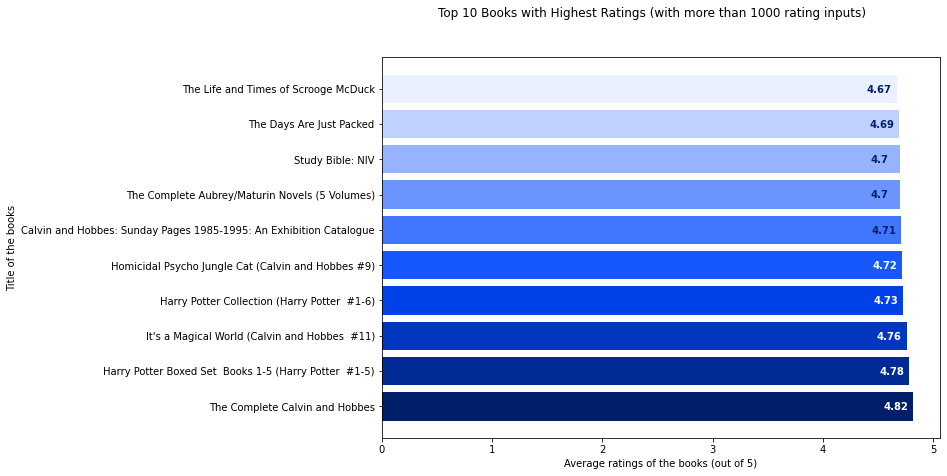

In [ ]:
#3.Books with highest rankings
#Find the highest rankings with more than 1000 rating inputs
high_rank = books[books['Number of Ratings'] > 1000]
high_rank = high_rank.sort_values('Rating',ascending=False).reset_index().head(10).set_index('Title')

#Determine the colors of the bar plots for visualization
colors = ['#011e6a','#012a94','#0136be','#0142e8','#1758fe','#4176fe','#6b94fe','#95b3fe','#c0d1ff','#eaf0ff']

#Create plot
fig, ax = plt.subplots(figsize=(10,7))
fig.suptitle('Top 10 Books with Highest Ratings (with more than 1000 rating inputs)')

ax.barh(high_rank.index, high_rank['Rating'],color=colors)
ax.set_xlabel('Average ratings of the books (out of 5)')
ax.set_ylabel('Title of the books');

#Determine the colors for the text
colort = ['#FFFFFF','#FFFFFF','#FFFFFF','#FFFFFF','#FFFFFF','#011e6a','#011e6a','#011e6a','#011e6a','#011e6a']
for i, v in enumerate(high_rank['Rating']):
  ax.text(v-0.27, i-0.1, str(v), color=colort[i], fontweight='bold')

Users favorites can be see in the upper graph. The most rated book is "The Complete Calvin and Hobbes".

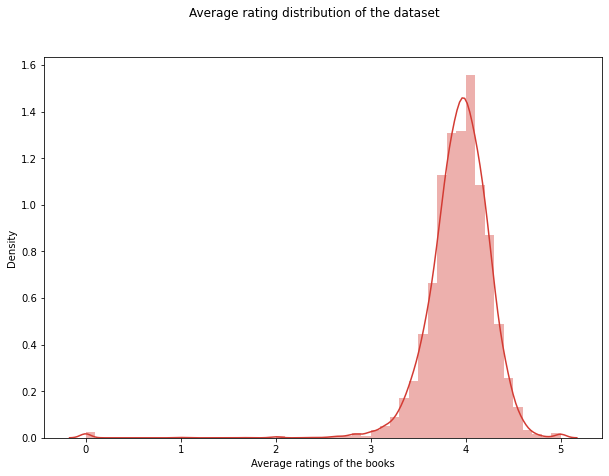

In [ ]:
#4. Average rating distribution
#Taking average rating column
aver = books['Rating']

#Create plot
fig, ax = plt.subplots(figsize=(10,7))
fig.suptitle('Average rating distribution of the dataset')

sns.distplot(aver,ax=ax, color='#D33B33')
ax.set_xlabel('Average ratings of the books')
ax.set_ylabel('Density');

Upper graph show the rating distribution of the books in the dataset. 
* The density of the books that have ~0 rating is almost equal to the density of the books that have ~5 rating.
* Most of the books have ~4 rating.

Let's find out which books have 0 and 5 ratings:

In [ ]:
print("Books with 0 rating:\n")
zero_rating = []
for i in books['Title'].index:
  if aver[i] == 0:
    zero_rating.append(books['Title'][i])

for number, letter in enumerate(zero_rating):
    print(number, letter)

Books with 0 rating:

0 Out to Eat London 2002 (Lonely Planet Out to Eat)
1 Juiced Official Strategy Guide
2 Open City 6: The Only Woman He Ever Left
3 How To Meditate: An Anthology Of Talks On Meditation And "Meditation: The Bridge Is Flowing But The River Is Not"
4 Insights: Talks On The Nature Of Existence
5 Venac sonetnih venaca; Puževa srma
6 Brodie's notes on Aldous Huxley's brave new world
7 American Film Guide
8 The Man and the Author: John Milton: Twentieth Century Perspectives
9 Canopy: A Work for Voice and Light in Harvard Yard
10 Laguna  I Love You: The Best of "Our Town"
11 American Writers  Supplement VIII
12 The Road To War  1933 39
13 I'll Be Home Before Midnight and I Won't Get Pregnant
14 Mythographi Graeci 1: Apollodori Bibliotheca  Apollodori epitoma  Procli excerpta ex cycli epici carminibus  Pediasmi libellus de duodecim Herculis...Graecorum et Romanorum Teubneriana
15 Sclerotherapy and vein treatment
16 The Berlin Phenomenology
17 Your Child and Jesus: A Family 

In [ ]:
print("Books with full rating:\n")
full_rating = []
for i in books['Title'].index:
  if aver[i] == 5:
    full_rating.append(books['Title'][i])

for number, letter in enumerate(full_rating):
    print(number, letter)

Books with full rating:

0 Comoediae 1: Acharenses/Equites/Nubes/Vespae/Pax/Aves
1 Willem de Kooning: Late Paintings
2 Literature Circle Guide: Bridge to Terabithia: Everything You Need For Successful Literature Circles That Get Kids Thinking  Talking  Writing—and Loving Literature
3 Middlesex Borough (Images of America: New Jersey)
4 Zone of the Enders: The 2nd Runner Official Strategy Guide
5 The Diamond Color Meditation: Color Pathway to the Soul
6 Bulgakov's the Master and Margarita: The Text as a Cipher
7 The Complete Theory Fun Factory: Music Theory Puzzles and Games for the Early Grades
8 The Goon Show  Volume 4: My Knees Have Fallen Off!
9 The Goon Show  Volume 11: He's Fallen in the Water!
10 Winchester Shotguns
11 Colossians and Philemon: A Critical and Exegetical Commentary (International Critical Commentary)
12 Taxation of Mineral Rents
13 The New Big Book of America
14 Delwau Duon: Peintiadau Nicholas Evans = Symphonies in Black: The Paintings of Nicholas Evans
15 Fanning 

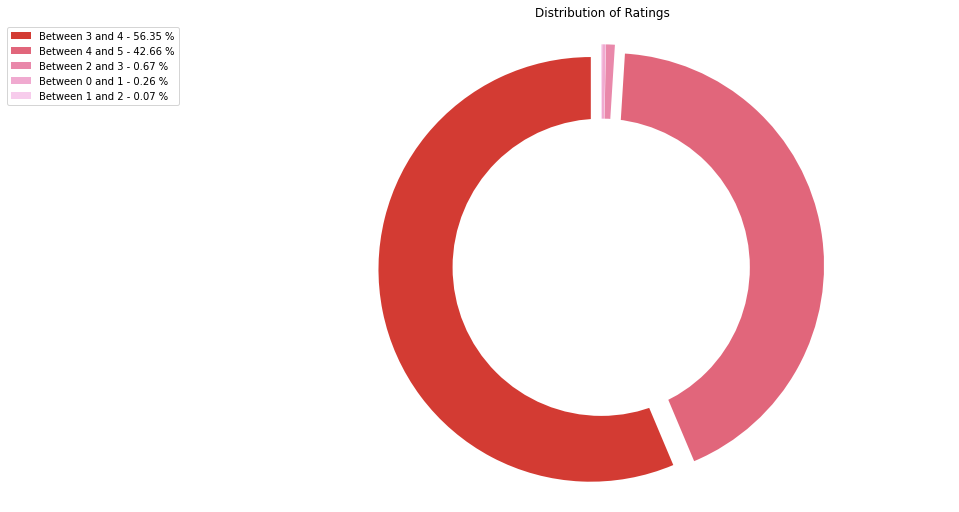

In [ ]:
#Find the distribution of the ratings with the help of pie chart

#First, find the category of each book for their ratings
rating = []
for i in books['Rating']:
  if i >= 0 and i <= 1:
    rating.append("Between 0 and 1")
  elif i > 1 and i <= 2:
    rating.append("Between 1 and 2")
  elif i > 2 and i <= 3:
    rating.append("Between 2 and 3")
  elif i > 3 and i <= 4:
    rating.append("Between 3 and 4")
  else:
    rating.append("Between 4 and 5")

#Create a new column for their rating category
books['Rating Category'] = rating
rate_pie = books['Rating Category'].value_counts().reset_index()
labels = rate_pie['index']

#Determine colors for the pie chart
colors = ['#D33B33','#E1667B','#E988AA','#F0AAD0','#F7CCEC']
#Find the percentages for the pie chart
percent = 100.*rate_pie['Rating Category']/rate_pie['Rating Category'].sum()

#Create pie chart
fig, ax = plt.subplots(figsize=(10,7))
ax.pie(rate_pie['Rating Category'], colors = colors, pctdistance=0.85, startangle=90, explode=(0.05, 0.05, 0.05, 0.05, 0.05))

#Draw a circle to empty the center of the pie chart
centre_circle = plt.Circle((0,0), 0.70, fc ='white')
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
plt.legend(labels, loc = 'best', bbox_to_anchor=(-0.1, 1.),)
plt.title('Distribution of Ratings');

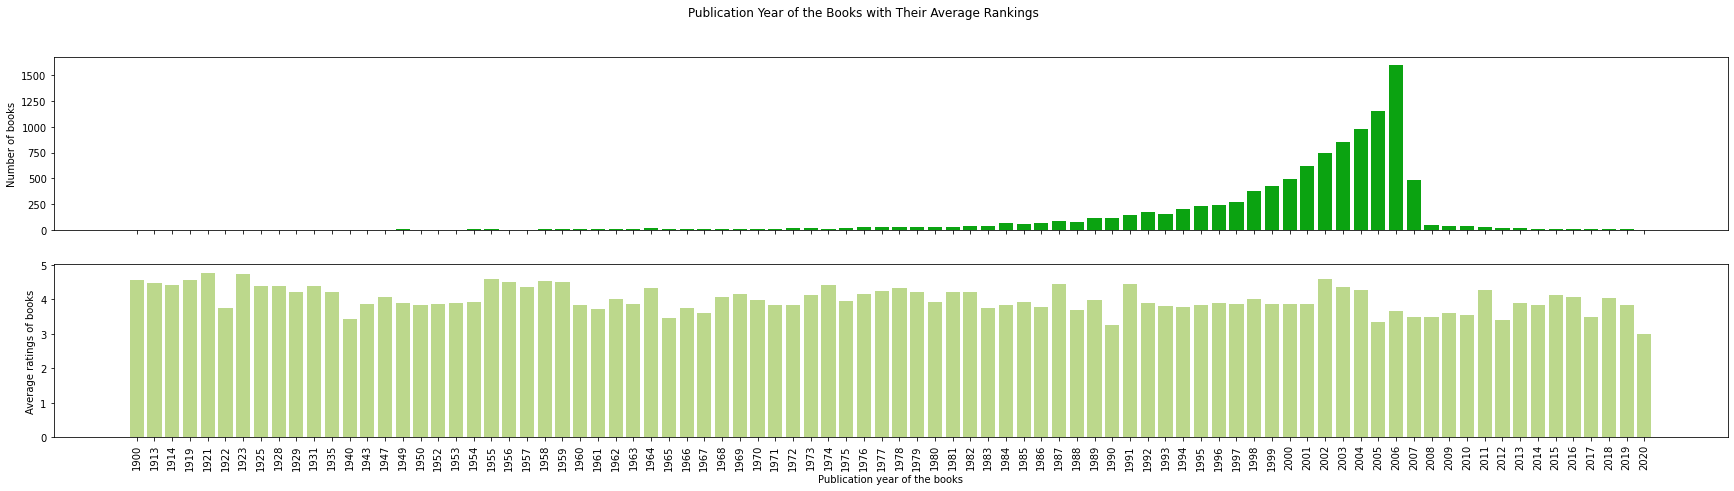

In [ ]:
#5. Rankings of the books vs. Publication year
#First, we take the publication years instead of dates
books['Publication Year'] = books['Publication Date'].str[-4:]
a = books.reset_index()

#Find the numbers of books for each publication year in the dataset
date_books = books.groupby('Publication Year')['Title'].count().reset_index().sort_values('Publication Year',ascending=True).set_index('Publication Year')

#Find the average rating of the books for each publication year
column_names = ['Rate']
m = pd.DataFrame(0, index=np.arange(86),columns = column_names)
for i in books['Publication Year']:
  for j in range(len(date_books)):
    if i == date_books.index[j]:
      m.loc[j] += a['Rating'].loc[j]

for i in range(86):
  m.loc[i][0] = m.loc[i][0] / date_books['Title'][i]

#Create bar plot
fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(30,7))
fig.suptitle('Publication Year of the Books with Their Average Rankings')

ax1.bar(date_books.index,date_books['Title'], color='#0BA311')
plt.xticks(rotation=90)
ax1.set_ylabel('Number of books')

ax2.bar(date_books.index,m['Rate'], color='#BCD88C')
ax2.set_ylabel('Average ratings of books')
ax2.set_xlabel('Publication year of the books');

From the upper bar graphs, we can see that the most publication was done in 2006 but the number of publication did not affect the ratings of the books.

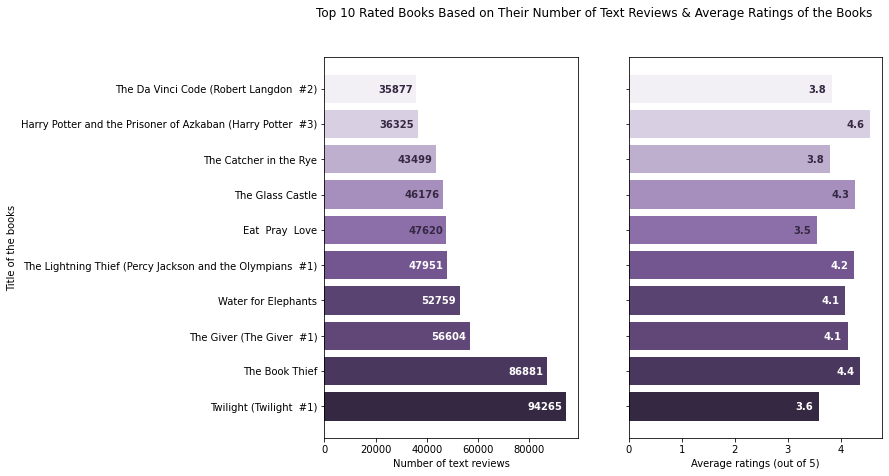

In [ ]:
#6. Most rated book based on their number of text reviews

#Find the most rated books based on the number of text reviews
most_text_rated = books.groupby('Title')['Number of Text Reviews'].sum().sort_values(ascending=False).head(10)

#Find the average ratings of the most rated books
ratings = []
for i in most_text_rated.index:
  ratings.append(books.loc[books['Title'] == i, 'Rating'].iloc[0])

#Determine the colors of the bar plots for visualization
colors = ['#352843','#4a375d','#604778','#594370','#735690','#8c6fa9','#a68fbc','#bfafcf','#d9cfe2','#f2eff5']

#Create bar plots with same y axes
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,7))
fig.suptitle('Top 10 Rated Books Based on Their Number of Text Reviews & Average Ratings of the Books')

ax1.barh(most_text_rated.index, most_text_rated,color=colors)
ax1.set_xlabel('Number of text reviews')
ax1.set_ylabel('Title of the books')

ax2.barh(most_text_rated.index,ratings, color=colors)
ax2.set_xlabel('Average ratings (out of 5)');

#Determine the colors for the text
colort = ['#FFFFFF','#FFFFFF','#FFFFFF','#FFFFFF','#FFFFFF','#352843','#352843','#352843','#352843','#352843']
for i, v in enumerate(most_text_rated):
  ax1.text(v-15000, i-0.1, str(v), color=colort[i], fontweight='bold')
for i, v in enumerate(ratings):
  ax2.text(v-0.45, i-0.1, str("{0:.1f}".format(v)), color=colort[i], fontweight='bold')

From the upper bar plots, we can understand the most text rated top 10 books from the left side. And from the right size, we can see the average ratings of those books. 

At the end, we can say that even there are so many text review of a book, it doesn't mean that, that book should be have high numeric rating.

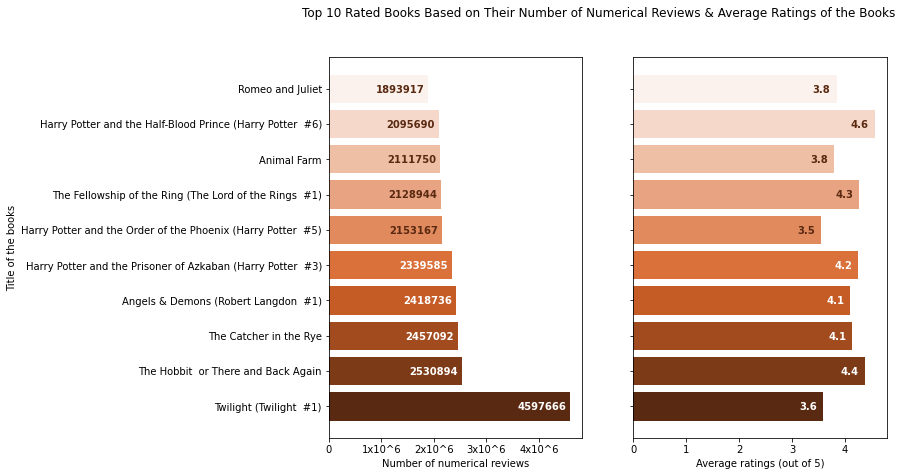

In [ ]:
#7.  Most rated book based on their number of numerical reviews
#Find the most rated books based on the number of numerical reviews
most_num_rated = books.groupby('Title')['Number of Ratings'].sum().sort_values(ascending=False).head(10)

#Find the average ratings of the most rated books
ratings = []
for i in most_text_rated.index:
  ratings.append(books.loc[books['Title'] == i, 'Rating'].iloc[0])

#Determine the colors of the bar plots for visualization
colors = ['#5a2911','#7d3a17','#a14b1e','#c55b25','#da703a','#e18a5e','#e8a482','#eebea5','#f5d8c9','#fcf2ed']

#Create bar plots with same y axes
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,  figsize=(10,7))
fig.suptitle('Top 10 Rated Books Based on Their Number of Numerical Reviews & Average Ratings of the Books')

ax1.barh(most_num_rated.index, most_num_rated,color=colors)
ax1.set_xlabel('Number of numerical reviews')
ax1.set_ylabel('Title of the books')
ax1.set_xticklabels([0,'1x10^6', '2x10^6', '3x10^6', '4x10^6','5x10^6'])

ax2.barh(most_num_rated.index,ratings, color=colors)
ax2.set_xlabel('Average ratings (out of 5)');

#Determine the colors for the text
colort = ['#FFFFFF','#FFFFFF','#FFFFFF','#FFFFFF','#FFFFFF','#5a2911','#5a2911','#5a2911','#5a2911','#5a2911']
for i, v in enumerate(most_num_rated):
  ax1.text(v-1000000, i-0.1, str(v), color=colort[i], fontweight='bold')
for i, v in enumerate(ratings):
  ax2.text(v-0.45, i-0.1, str("{0:.1f}".format(v)), color=colort[i], fontweight='bold')

From the upper bar plots, we can understand the most numerical rated top 10 books from the left side. And from the right size, we can see the average ratings of those books. 

At the end, we can say that even there are so many text review of a book, it doesn't mean that, that book should be have high numeric rating.

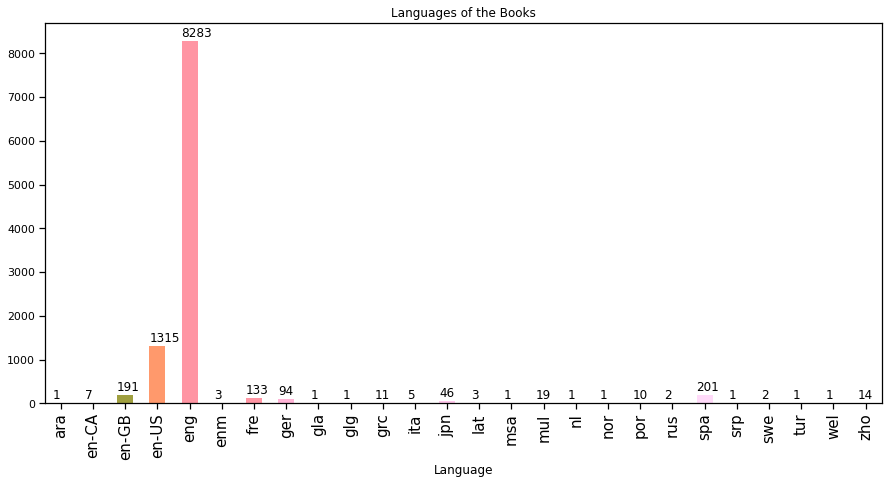

In [ ]:
#8. Languages of the books
sns.set_context('notebook')
plt.figure(figsize=(15,7))

#Color scale
colors = ['#000000','#000000','#9F9F3F','#FF996C','#FF95A3','#000000','#FF95A3','#FFB4D6','#000000','#000000',
          '#000000','#000000','#FFC7EB','#000000','#000000','#000000','#000000','#000000','#000000','#000000',
          '#FFDAF9','#000000','#000000','#000000','#000000','#000000']

ax = books.groupby('Language')['Title'].count().plot.bar(color=colors)
plt.title('Languages of the Books')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()+100))

To understand the upper bar graph, first, let's look at the ISO 639-1 and 639-2 standard language codes. Our resource is https://www.loc.gov/standards/iso639-2/php/code_list.php.

* ara   = Arabic
* en-CA = English (Canada)
* en-GB = English (United Kingdom)
* en-US = English (United States)
* eng   = English
* enm   = English
* fre   = French
* ger   = German
* gla   = Gaelic, Scottish Gaelic
* glg   = Galician
* grc   = Greek, Ancient
* ita   = Italian
* jpn   = Japanese
* lat   = Latin
* msa   = Malay
* mul   = Multiple languages
* nl    = Dutch, Flemish
* nor   = Norwegian
* por   = Portuguese
* rus   = Russian
* spa   = Spanish, Castilian
* srp   = Serbian
* swe   = Swedish
* tur   = Turkish
* wel   = Welsh
* zho   = Chinese

From this plot, we can understand that most of the books was originally published in English language.  

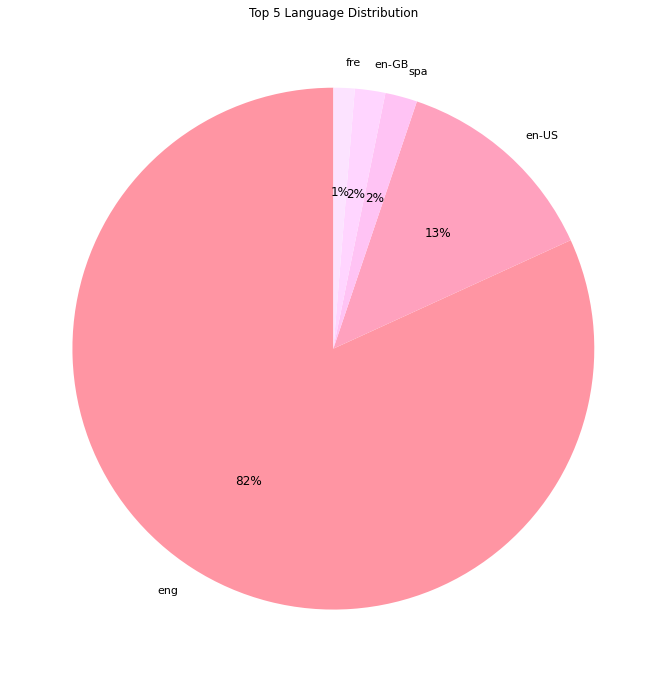

In [ ]:
#Let's look at the top 5 language in a pie chart
#Find the top 5
five_most_language = books.groupby('Language')['Title'].count().reset_index().sort_values('Title',ascending=False).head(5).set_index('Language')

#Create the pie chart
labels   = five_most_language.index
sections = five_most_language['Title']
colors   = ['#FF95A3','#FFA1BE','#FFC3F4','#FFD5FF','#FCE3FF']

figure(figsize=(12, 12))
plt.pie(sections, labels=labels, colors=colors,startangle=90,autopct = '%1.0f%%')
plt.title('Top 5 Language Distribution')
labels = five_most_language.index
#plt.legend(labels, loc = 'best', bbox_to_anchor=(-0.1, 1.),);
plt.show()

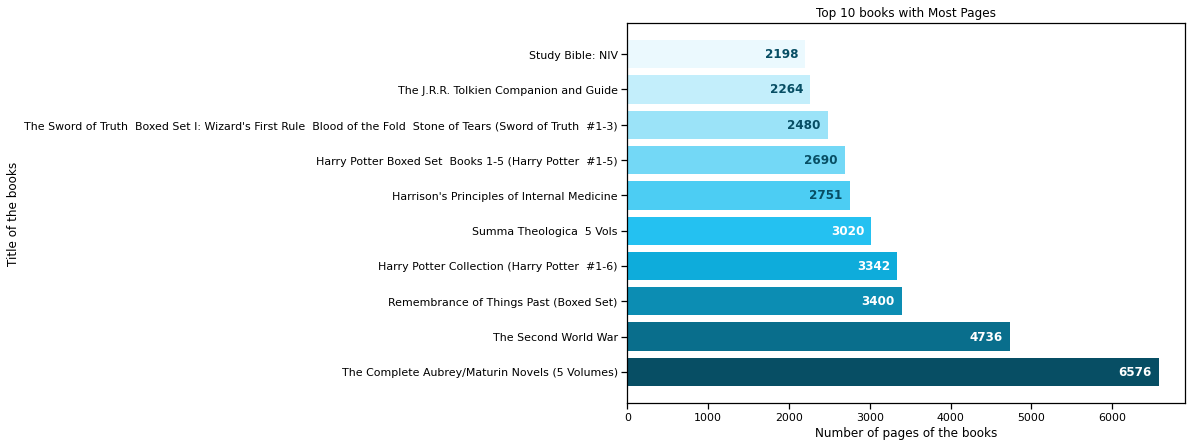

In [ ]:
#9. Most pages
#Sorting the books based on their page numbers
most_page = books.sort_values('Page Number', ascending = False).head(10).set_index('Title')

#Determine the colors of the bar plots for visualization
colors = ['#074e64','#096e8c','#0c8db3','#0eacdb','#24c1f1','#4ccdf3','#73d8f6','#9be3f8','#c3eefb','#ebf9fe']

#Create plot
fig, ax = plt.subplots(figsize=(10,7))


ax.barh(most_page.index, most_page['Page Number'],color=colors)
ax.set_xlabel('Number of pages of the books')
ax.set_ylabel('Title of the books')
ax.set_title('Top 10 books with Most Pages');

#Determine the colors for the text
colort = ['#FFFFFF','#FFFFFF','#FFFFFF','#FFFFFF','#FFFFFF','#074e64','#074e64','#074e64','#074e64','#074e64']
for i, v in enumerate(most_page['Page Number']):
  ax.text(v-500, i-0.1, str(v), color=colort[i], fontweight='bold')

The upper graph shows us the top 10 books with most 10 pages. The book that have most pages in this dataset is "The Complete Aubrey/Maturin Novels (5 Volumes)" with 6576 pages.

<Figure size 720x504 with 0 Axes>

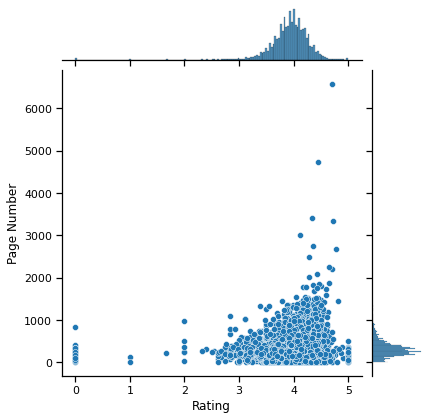

In [ ]:
#10. Ratings vs. Page Number
plt.figure(figsize=(10,7))

g = sns.JointGrid(data=books, x = 'Rating', y = 'Page Number', palette = 'paper')
g.plot(sns.scatterplot, sns.histplot);

With the upper scatter plot, we see the distribution of the rating of the books to the rating counts. As a result, it can be seen that most of the books have **4 point** ratings and **500** page number.

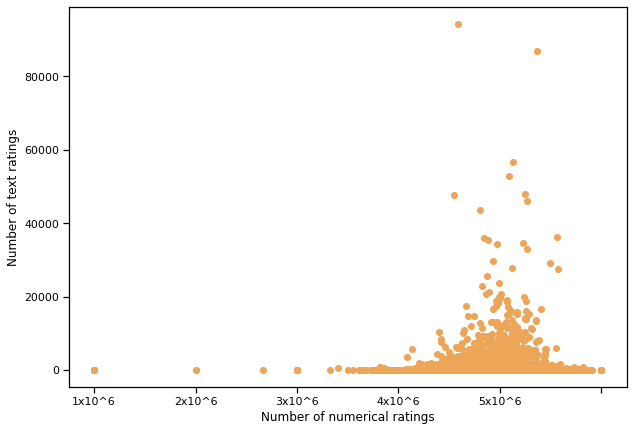

In [ ]:
#11. Text review count vs. Numeric review count

fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(books['Rating'],books['Number of Text Reviews'],color='#EDA558')
ax.set_xlabel('Number of numerical ratings')
ax.set_ylabel('Number of text ratings')
ax.set_xticklabels([0,'1x10^6', '2x10^6', '3x10^6', '4x10^6','5x10^6']);

With the upper scatter plot, we see the distribution of the text ratingsto the numerical ratings. As a result, it can be seen that most of the books have **10000 text rating** and **1.000.000 numerical rating**.

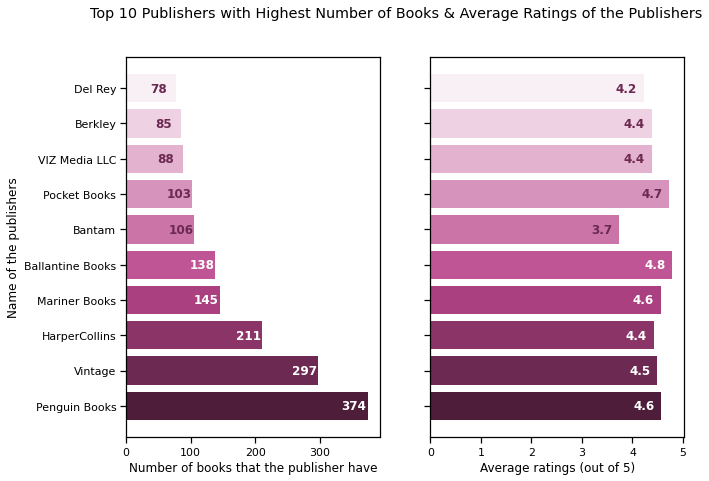

In [ ]:
#12. Publishers with their average ratings
#Find the most popular publishers
most_publish = books.groupby('Publisher')['Title'].count().reset_index().sort_values('Title',ascending=False).head(10).set_index('Publisher')

#Find the average ratings of those publishers
column_names = ["Publisher Average Rating"]
n = pd.DataFrame(0, index=np.arange(10),columns = column_names)
for i in books['Publisher']:
  if i in most_publish.index:
    for j in range(len(most_publish.index)):
      if i == most_publish.index[j]:
        n.loc[j] += books['Rating'].loc[j]

for i in range(10):
  n.iloc[i] = n.iloc[i]/(most_publish.iloc[i][0])

#Determine the colors of the bar plots for visualization
colors = ['#4d1d3a','#6c2951','#8b3468','#aa407f','#bf5594','#cb74a7','#d693bb','#e2b2ce','#eed1e2','#f9f0f5']

#Create bar plots with same y axes
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,7))
fig.suptitle('Top 10 Publishers with Highest Number of Books & Average Ratings of the Publishers')

ax1.barh(most_publish.index, most_publish['Title'], color=colors)
ax1.set_xlabel('Number of books that the publisher have')
ax1.set_ylabel('Name of the publishers')

ax2.barh(most_publish.index,n['Publisher Average Rating'], color=colors)
ax2.set_xlabel('Average ratings (out of 5)');

#Determine the colors for the text
colort = ['#FFFFFF','#FFFFFF','#FFFFFF','#FFFFFF','#FFFFFF','#6c2951','#6c2951','#6c2951','#6c2951','#6c2951']

for i, v in enumerate(most_publish['Title']):
  ax1.text(v-40, i-0.1, str(v), color=colort[i], fontweight='bold')
for i, v in enumerate(n['Publisher Average Rating']):
  ax2.text(v-0.55, i-0.1, str("{0:.1f}".format(v)), color=colort[i], fontweight='bold')

When we look at the upper bar graphs, we can see most 10 popular publishers and their average rankings.

As a results, we can say that even the publisher is popular by the value counts, it doesn't mean that it has higher ranking.

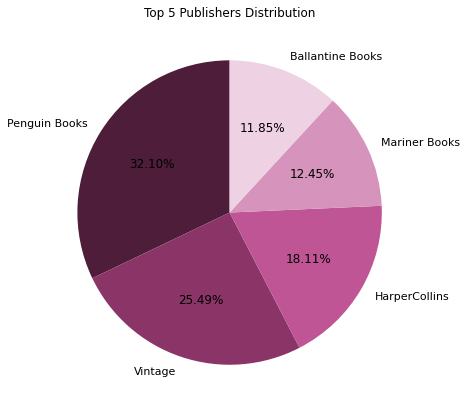

In [ ]:
#Let's look at the top 5 publishers in a pie chart

#First find the top 5
five_most_publish = books.groupby('Publisher')['Title'].count().reset_index().sort_values('Title',ascending=False).head(5).set_index('Publisher')

#Create the pie chart
labels   = five_most_publish.index
sections = five_most_publish['Title']
colors   = ['#4d1d3a','#8b3468','#bf5594','#d693bb','#eed1e2']

figure(figsize=(10, 7))
plt.pie(sections, labels=labels, colors=colors,startangle=90,autopct = '%1.2f%%')
plt.title('Top 5 Publishers Distribution')
plt.show()